## Deep Neural Network model with OHE-PCA
*Summary:* In this notebook, we use a DNN model using PCA analysis. We use one-hot encoding for the categorical variables and reduce the dimensionality from a total of 196 features to 18 features, that retain the explanation of 95% of the variance.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("../dataset/UNSW_NB15_testing-set.csv")

In [12]:
df = pd.concat([train, test]).reset_index(drop=True)
df = df.drop(columns=["id"], axis=1)

# one hot encode categorical variables and concatenate them with the numerical variables
num_cols = df._get_numeric_data().columns[:-1]
dummies_df = pd.concat(
    [
        df[num_cols],
        pd.get_dummies(df['state']), 
        pd.get_dummies(df['service']), 
        pd.get_dummies(df['proto'])
    ], 
    axis=1)

dummies_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,visa,vmtp,vrrp,wb-expak,wb-mon,wsn,xnet,xns-idp,xtp,zero
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
257669,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,...,0,0,0,0,0,0,0,0,0,0
257670,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
257671,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

# apply min-max scaler that scales the variables in the range [0-1]
scl = MinMaxScaler()
dummies_df = scl.fit_transform(dummies_df)

In [14]:
from sklearn.decomposition import PCA

# apply principal component analysis
pca = PCA(n_components=0.95)
pca_df = pca.fit_transform(dummies_df)
pca_df = pd.DataFrame(pca_df)

pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.139665,0.691133,0.033781,-0.123732,0.159891,-0.523700,-0.322463,-0.037430,0.125500,0.001090,0.038912,0.111895,0.081098,-0.141533,-0.013122,-0.061079,0.092185,-0.099478
1,1.134885,0.697829,0.023619,-0.127989,0.178153,-0.522009,-0.409717,-0.014354,0.170584,0.007360,0.134525,0.286903,0.003883,-0.126337,0.003497,-0.106215,0.080168,-0.062628
2,1.148204,0.691567,0.016223,-0.125080,0.154072,-0.525683,-0.354547,-0.032282,0.147059,0.004373,0.088459,0.203503,0.058159,-0.152448,0.003864,-0.038568,0.046168,-0.013226
3,1.149644,0.685189,0.015876,-0.127804,0.145047,-0.521827,-0.332389,-0.030487,0.133900,0.003557,0.076222,0.186266,0.069142,-0.143479,-0.002248,-0.047803,0.062347,-0.035391
4,1.137643,0.689183,0.014163,-0.136374,0.167205,-0.515563,-0.412557,0.000424,0.171118,0.009367,0.164773,0.351305,-0.014860,-0.108051,0.003248,-0.138290,0.095059,-0.076184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1.625976,-0.681540,-0.287382,-0.071370,-0.202190,0.038976,0.055435,0.029347,-0.052598,-0.001430,-0.014590,0.004202,-0.014239,0.039169,-0.009705,-0.044267,0.049091,-0.045421
257669,-1.524051,0.238075,-0.484932,-0.461644,0.070493,-0.006903,-0.131525,-0.155011,-0.253907,0.035962,0.178556,-0.217753,-0.037990,-0.010673,-0.001146,-0.053777,-0.016547,0.027020
257670,1.505197,-0.506249,-0.119243,0.017648,0.105110,-0.042891,-0.293114,-0.058227,0.133216,-0.005714,-0.080026,-0.265888,-0.128814,-0.093194,0.010285,-0.008992,0.003542,-0.148684
257671,1.668222,-0.740886,-0.346176,-0.105249,-0.311411,0.064058,0.180714,0.060177,-0.114695,0.000400,0.011547,0.102086,0.027500,0.078313,-0.016644,-0.057298,0.063623,-0.022723


In [15]:
from sklearn.model_selection import train_test_split

y = pd.get_dummies(df['attack_cat'])
X = pca_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((172640, 18), (85033, 18), (172640, 10), (85033, 10))

### Tensorflow model

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
plt.style.use('ggplot')
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [17]:
model = keras.Sequential(
    [
        layers.Dense(256, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(10, activation='softmax', use_bias=True)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4864      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 88,586
Trainable params: 88,586
Non-traina

In [18]:
model.compile('adam', loss='categorical_crossentropy', metrics='accuracy')

monitor_val_acc = EarlyStopping(monitor='loss', patience=10)
callbacks=[PlotLossesKeras()]

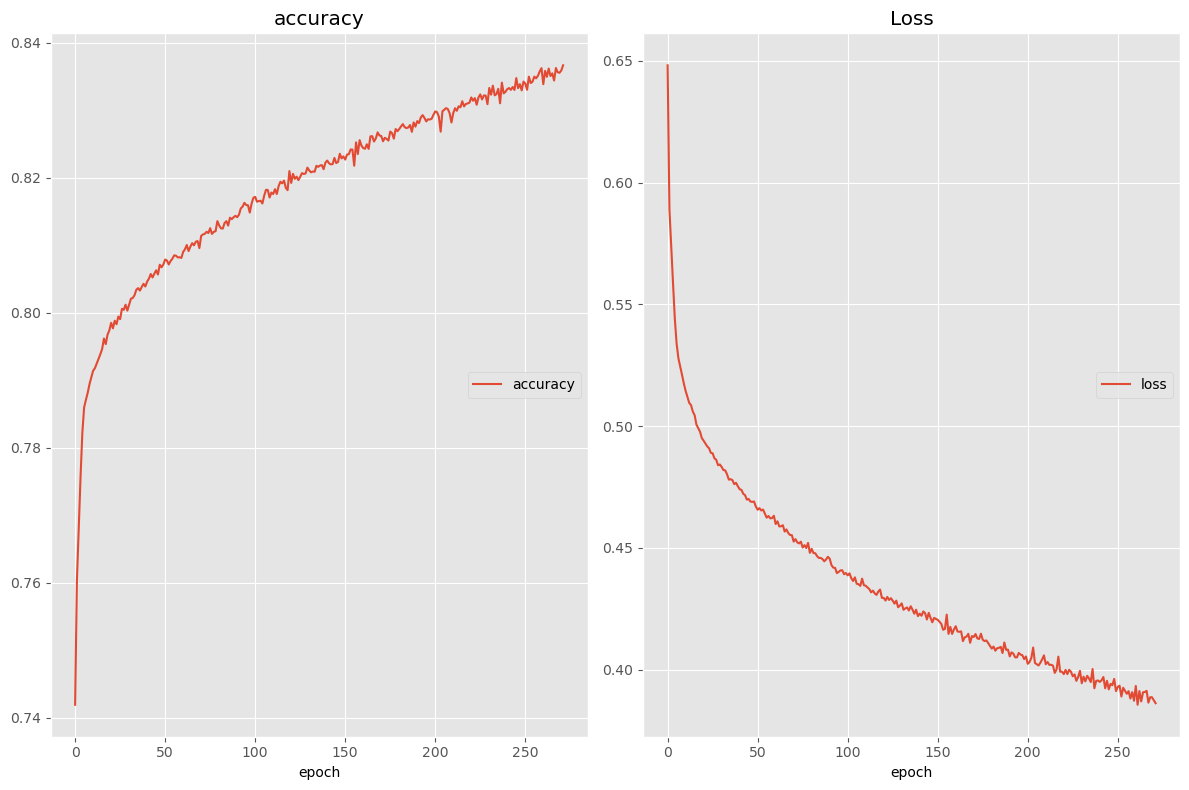

accuracy
	accuracy         	 (min:    0.742, max:    0.837, cur:    0.837)
Loss
	loss             	 (min:    0.386, max:    0.648, cur:    0.386)


In [19]:
model.fit(X_train, y_train, epochs=1000, batch_size=128, callbacks=[PlotLossesKeras(), monitor_val_acc], shuffle=1000, verbose=0)

In [21]:
model.evaluate(X_test, y_test)

2658/2658 [==============================] - 5s 2ms/step - loss: 0.6238 - accuracy: 0.8081


[0.6237846612930298, 0.8080745339393616]